<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/pandas/2024_05_03_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
import pandas as pd
import numpy as np


#skip

dti = pd.to_datetime(
        ["1/1/2018", np.datetime64("2018-01-01"), datetime.datetime(2018, 1, 1)]
    )

dti


DatetimeIndex(['2018-01-01', '2018-01-01', '2018-01-01'], dtype='datetime64[ns]', freq=None)

In [ ]:
#  generate sequence


#skip

pd.date_range("2018-01-01", periods=3, freq="h")

dti



DatetimeIndex(['2018-01-01', '2018-01-01', '2018-01-01'], dtype='datetime64[ns]', freq=None)

In [ ]:

#skip

dti = dti.tz_localize("UTC")

dti.tz_convert("US/Pacific")

dti

DatetimeIndex(['2018-01-01 00:00:00+00:00', '2018-01-01 00:00:00+00:00',
               '2018-01-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

In [ ]:
#skip


idx = pd.date_range("2018-01-01", periods=5, freq="h")
ts = pd.Series(range(len(idx)), index=idx)

ts



2018-01-01 00:00:00    0
2018-01-01 01:00:00    1
2018-01-01 02:00:00    2
2018-01-01 03:00:00    3
2018-01-01 04:00:00    4
Freq: H, dtype: int64

In [ ]:
#skip


ts.resample("2h").mean()

2018-01-01 00:00:00    0.5
2018-01-01 02:00:00    2.5
2018-01-01 04:00:00    4.0
Freq: 2H, dtype: float64

In [ ]:
#skip

#Resampling or converting a time series to a particular frequency

friday = pd.Timestamp("2018-01-05")

print(friday.day_name())

saturday = friday + pd.Timedelta("1 day")

print(saturday.day_name())


# Add 1 business day (Friday --> Monday)
monday = friday + pd.offsets.BDay()

print(monday.day_name())

print(monday)

Friday
Saturday
Monday
2018-01-08 00:00:00


In [ ]:
#skip

pd.Timestamp(pd.NaT)

NaT

In [ ]:
#skip

ts = pd.Timestamp('2017-01-01T12')
ts

Timestamp('2017-01-01 12:00:00')

In [ ]:
#skip

date=pd.date_range("2018-01-01", periods=7, freq="D")
number=np.linspace(1,7,7)

data=pd.DataFrame(number,index=date)

data

,0
2018-01-01,1.0
2018-01-02,2.0
2018-01-03,3.0
2018-01-04,4.0
2018-01-05,5.0
2018-01-06,6.0
2018-01-07,7.0


<Axes: >

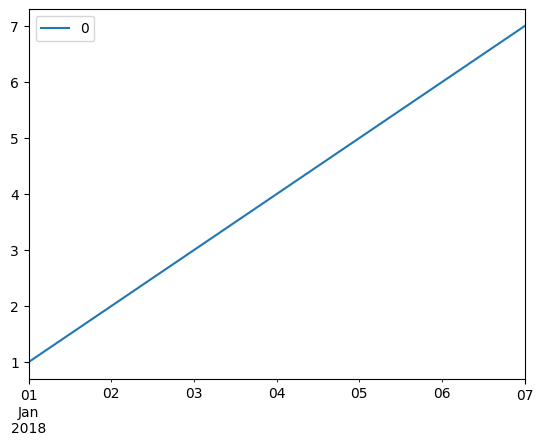

In [ ]:
#skip

data.plot()

In [ ]:
#skip

data.columns

RangeIndex(start=0, stop=7, step=1)

# Test Case:  Parse Weather Data

Read this weather data and put it into time series format

https://raw.githubusercontent.com/werowe/HypatiaAcademy/master/pandas/weatherdata.csv


* calculate average weather by year and by month and year




In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/werowe/HypatiaAcademy/master/pandas/weatherdata.csv")

df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [ ]:
# convert date to datetimeformat

# you cannot do this with the salary data as we only have year

# skip this part with the salary data

from datetime import datetime

df['date']= df['date'].apply(lambda d : datetime.fromisoformat(d))
df['date']

0      2013-01-01
1      2013-01-02
2      2013-01-03
3      2013-01-04
4      2013-01-05
          ...    
1457   2016-12-28
1458   2016-12-29
1459   2016-12-30
1460   2016-12-31
1461   2017-01-01
Name: date, Length: 1462, dtype: datetime64[ns]

In [ ]:
df.index

Index(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
       '2013-01-06', '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
       ...
       '2016-12-23', '2016-12-24', '2016-12-25', '2016-12-26', '2016-12-27',
       '2016-12-28', '2016-12-29', '2016-12-30', '2016-12-31', '2017-01-01'],
      dtype='object', name='date', length=1462)

In [ ]:
df.set_index("date",inplace=True)
df

KeyError: "None of ['date'] are in the columns"

In [ ]:
# cast all floats to int

# this gets of the decimal points

# don't need

df = df.astype(int)
df


,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10,84,0,1015
2013-01-02,7,92,2,1017
2013-01-03,7,87,4,1018
2013-01-04,8,71,1,1017
2013-01-05,6,86,3,1016
...,...,...,...,...
2016-12-28,17,68,3,1015
2016-12-29,15,87,6,1016
2016-12-30,14,89,6,1017


In [ ]:
df.groupby(pd.Grouper(freq='Y')).mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [ ]:
df.groupby(pd.Grouper(freq='M')).mean()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-31,11.645161,72.645161,4.387097,1017.354839
2013-02-28,16.392857,71.500000,7.000000,1015.607143
2013-03-31,22.451613,56.967742,8.161290,1011.354839
2013-04-30,28.533333,34.233333,7.500000,1005.866667
2013-05-31,33.258065,28.645161,8.387097,999.483871
2013-06-30,32.066667,58.366667,9.133333,997.100000
2013-07-31,30.161290,74.483871,6.903226,997.032258
2013-08-31,29.225806,76.354839,6.967742,1000.032258
2013-09-30,29.400000,64.166667,7.100000,1003.533333


<Axes: xlabel='date'>

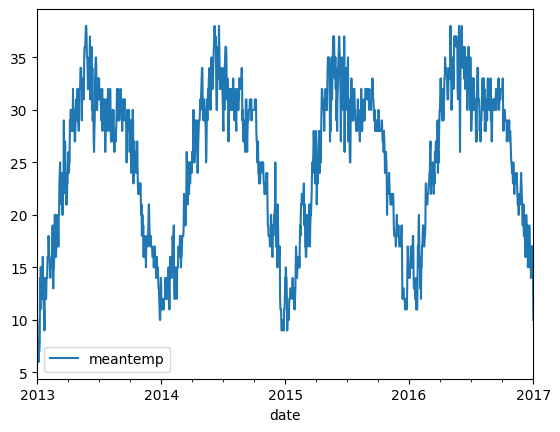

In [ ]:
df.plot(y="meantemp",use_index=True)

# Homework

Calculate average salary by year on this data

https://github.com/fivethirtyeight/data/tree/master/us-weather-history